# Install Libs

In [1]:
!pip install --upgrade JLpyUtils 
import IPython.display
IPython.display.clear_output()

# Import Libs

In [1]:
import numpy as np
import pandas as pd
import sys, os, importlib, gc
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings

import dask, dask.dataframe

In [2]:
pd.options.display.max_columns = 1000
mpl.rcParams['font.size']=14

In [3]:
dev = True

In [4]:
path_desktop = os.path.abspath('..')
if dev:
    print('Running in dev mode. Using local copy of JLpyUtils')
    path_dev_repo = os.path.join(path_desktop,'JLpyUtils')
    sys.path.insert(0, path_dev_repo)

import JLpyUtils
JLpyUtils.__version__

Running in dev mode. Using local copy of JLpyUtils


/Users/johnleonard/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/johnleonard/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/johnleonard/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/johnleonard/anaconda3/lib/python3.6/site-packages/tensorf

'0.2.17'

# Build Report Dir

In [5]:
path_report_dir = os.path.join(path_desktop,'outputs','Project_Kaggle_BigQuery-Geotab_Intersection_Congestion')

if os.path.isdir(path_report_dir)==False:
    os.makedirs(path_report_dir)
    
print('path_report_dir:\n',path_report_dir)

path_report_dir:
 /Users/johnleonard/Desktop/Data_Science_Projects/outputs/Project_Kaggle_BigQuery-Geotab_Intersection_Congestion


# Download Data

In [6]:
importlib.reload(JLpyUtils.kaggle)

competition = 'bigquery-geotab-intersection-congestion'

# JLpyUtils.kaggle.setup_config_dir(username='jtleona01', key = 'foo')
# JLpyUtils.kaggle.competition_download_files(competition,
#                                             path_report_dir=path_report_dir)
path_competition_data = os.path.join(path_report_dir,competition)
os.listdir(path_competition_data)

['BigQuery-Dataset-Access.md',
 'test.csv',
 'train.csv',
 'submission_metric_map.json',
 'sample_submission.csv']

# Load Data

In [7]:
df_train = dask.dataframe.read_csv(os.path.join(path_competition_data,'train.csv'))
df_train = df_train.set_index('RowId')

df_field = dask.dataframe.read_csv(os.path.join(path_competition_data,'test.csv'))
df_field = df_field.set_index('RowId')

In [8]:
n_train_samples = df_train.iloc[:,0].compute().shape[0]
n_field_samples = df_field.iloc[:,0].compute().shape[0]

print('n_train_samples:',n_train_samples)
print('n_field_samples:',n_field_samples)

n_train_samples: 857409
n_field_samples: 1920335


In [9]:
display(df_train.head())

IntersectionId  Latitude  Longitude               EntryStreetName  \
RowId                                                                        
1920335               0  33.79166  -84.43003  Marietta Boulevard Northwest   
1920336               0  33.79166  -84.43003  Marietta Boulevard Northwest   
1920337               0  33.79166  -84.43003  Marietta Boulevard Northwest   
1920338               0  33.79166  -84.43003  Marietta Boulevard Northwest   
1920339               0  33.79166  -84.43003  Marietta Boulevard Northwest   

                       ExitStreetName EntryHeading ExitHeading  Hour  Weekend  \
RowId                                                                           
1920335  Marietta Boulevard Northwest           NW          NW     0        0   
1920336  Marietta Boulevard Northwest           SE          SE     0        0   
1920337  Marietta Boulevard Northwest           NW          NW     1        0   
1920338  Marietta Boulevard Northwest           SE          SE     1        0   
1920339  Marietta Boulevard Northwest           NW          NW     2        0   

         Month                                               Path  \
RowId                                                               
1920335      6  Marietta Boulevard Northwest_NW_Marietta Boule...   
1920336      6  Marietta Boulevard Northwest_SE_Marietta Boule...   
1920337      6  Marietta Boulevard Northwest_NW_Marietta Boule...   
1920338      6  Marietta Boulevard Northwest_SE_Marietta Boule...   
1920339      6  Marietta Boulevard Northwest_NW_Marietta Boule...   

         TotalTimeStopped_p20  TotalTimeStopped_p40  TotalTimeStopped_p50  \
RowId                                                                       
1920335                     0                     0                     0   
1920336                     0                     0                     0   
1920337                     0                     0                     0   
1920338                     0                     0                     0   
1920339                     0                     0                     0   

         TotalTimeStopped_p60  TotalTimeStopped_p80  TimeFromFirstStop_p20  \
RowId                                                                        
1920335                     0                     0                      0   
1920336                     0                     0                      0   
1920337                     0                     0                      0   
1920338                     0                     0                      0   
1920339                     0                     0                      0   

         TimeFromFirstStop_p40  TimeFromFirstStop_p50  TimeFromFirstStop_p60  \
RowId                                                                          
1920335                      0                      0                      0   
1920336                      0                      0                      0   
1920337                      0                      0                      0   
1920338                      0                      0                      0   
1920339                      0                      0                      0   

         TimeFromFirstStop_p80  DistanceToFirstStop_p20  \
RowId                                                     
1920335                      0                      0.0   
1920336                      0                      0.0   
1920337                      0                      0.0   
1920338                      0                      0.0   
1920339                      0                      0.0   

         DistanceToFirstStop_p40  DistanceToFirstStop_p50  \
RowId                                                       
1920335                      0.0                      0.0   
1920336                      0.0                      0.0   
1920337                      0.0                      0.0   
1920338                      0.0           

In [10]:
df_field.head()

IntersectionId  Latitude  Longitude             EntryStreetName  \
RowId                                                                    
0                   1  33.75094  -84.39303  Peachtree Street Southwest   
1                   1  33.75094  -84.39303  Peachtree Street Southwest   
2                   1  33.75094  -84.39303  Peachtree Street Southwest   
3                   1  33.75094  -84.39303  Peachtree Street Southwest   
4                   1  33.75094  -84.39303  Peachtree Street Southwest   

                   ExitStreetName EntryHeading ExitHeading  Hour  Weekend  \
RowId                                                                       
0       Mitchell Street Southwest           SW          SE     0        0   
1      Peachtree Street Southwest           SW          SW     0        0   
2      Peachtree Street Southwest           NE          NE     1        0   
3      Peachtree Street Southwest           SW          SW     1        0   
4      Peachtree Street Southwest           NE          NE     2        0   

       Month                                               Path     City  
RowId                                                                     
0          6  Peachtree Street Southwest_SW_Mitchell Street ...  Atlanta  
1          6  Peachtree Street Southwest_SW_Peachtree Street...  Atlanta  
2          6  Peachtree Street Southwest_NE_Peachtree Street...  Atlanta  
3          6  Peachtree Street Southwest_SW_Peachtree Street...  Atlanta  
4          6  Peachtree Street Southwest_NE_Peachtree Street...  Atlanta

# Define Headers Dictionary

In [13]:
headers_dict = {}
headers_dict['features'] = list(df_field.columns)
headers_dict['labels'] = [header for header in df_train.columns if ('TotalTime' in header or 'DistanceTo' in header) and ('p20' in header or 'p50' in header or 'p80' in header)]

headers_dict['categorical features'] = [col for col in df_field.columns if df_field[col].compute().nunique()<20 and col not in headers_dict['labels']]
headers_dict['categorical features'] = headers_dict['categorical features'] + [feat for feat in df_train.columns if df_train[feat].dtype=='O' and feat not in headers_dict['categorical features']]
headers_dict['categorical features'] = headers_dict['categorical features']+['IntersectionId','Hour']
headers_dict['continuous features']= [feat for feat in headers_dict['features'] if feat not in headers_dict['categorical features']]


print('categorical features:\n','\n '.join(headers_dict['categorical features']))
print('continuous features:\n','\n '.join(headers_dict['continuous features']))
print('\nlabels:\n','\n '.join(headers_dict['labels']))

categorical features:
 EntryHeading
 ExitHeading
 Weekend
 Month
 City
 EntryStreetName
 ExitStreetName
 Path
 IntersectionId
 Hour
continuous features:
 Latitude
 Longitude

labels:
 TotalTimeStopped_p20
 TotalTimeStopped_p50
 TotalTimeStopped_p80
 DistanceToFirstStop_p20
 DistanceToFirstStop_p50
 DistanceToFirstStop_p80


# Define X, y

In [14]:
npartitions = df_train.npartitions+df_field.npartitions
npartitions

7

In [15]:
X = pd.concat((df_train[headers_dict['features']].compute(),
               df_field[headers_dict['features']].compute()))

y = df_train[headers_dict['labels']].compute()

# Visualize

In [ ]:
importlib.reload(JLpyUtils.plot)
JLpyUtils.plot.hist_or_bar(X, categorical_headers=headers_dict['categorical features'])

In [ ]:
JLpyUtils.plot.hist_or_bar(y, xscale='log')

# Cleanup Data

In [16]:
def cleanup_text_features(X):
    """
    Ensure the direction text is of a consistant format
    
    Arguments:
    ----------
        X: dataframe containing features of interest
        
    Returns:
    --------
        X: dataframe with 'object' (string) columns cleaned
    """
    import warnings
    warnings.filterwarnings('ignore')
    X = X.copy()
    
    type_X = str(type(X))
    if 'dask' in type_X:
        npartitions = X.npartitions
        X = X.compute()
        
        
        
    object_cols = X.dtypes.reset_index()
    object_cols = object_cols[object_cols[0]=='object']
        
    for col in object_cols['index']:
        
        X[col] = X[col].str.lower()
        
        for old_str, new_str in [['northwest','nw'],
                                 ['northeast','ne'],
                                 ['southwest','sw'],
                                 ['southeast','se'],
                                 ['first','1st'],
                                 ['second','2nd'],
                                 ['third','3rd'],
                                 ['fourth','4th'],
                                 ['fifth','5th'],
                                 ['sixth','6th'],
                                 ['seventh','7th'],
                                 ['eighth','8th'],
                                 ['ninth','9th'],
                                 ['tenth','10th'],
                                 ['eleventh','11th'],
                                 ['twelfth','12th'],
                                 ['thirteenth','13th'],
                                 ['fourteenth','14th'],
                                 ['fifteenth','15th'],
                                 ['sixteenth','16th']]:
            X[col] = X[col].str.replace(old_str, new_str)
            X[col][X[col]=='None']=np.nan
    
    warnings.filterwarnings('default')
    return X
        
X = cleanup_text_features(X)
X.head()

IntersectionId  Latitude  Longitude        EntryStreetName  \
RowId                                                                 
1920335               0  33.79166  -84.43003  marietta boulevard nw   
1920336               0  33.79166  -84.43003  marietta boulevard nw   
1920337               0  33.79166  -84.43003  marietta boulevard nw   
1920338               0  33.79166  -84.43003  marietta boulevard nw   
1920339               0  33.79166  -84.43003  marietta boulevard nw   

                ExitStreetName EntryHeading ExitHeading  Hour  Weekend  Month  \
RowId                                                                           
1920335  marietta boulevard nw           nw          nw     0        0      6   
1920336  marietta boulevard nw           se          se     0        0      6   
1920337  marietta boulevard nw           nw          nw     1        0      6   
1920338  marietta boulevard nw           se          se     1        0      6   
1920339  marietta boulevard nw           nw          nw     2        0      6   

                                                      Path     City  
RowId                                                                
1920335  marietta boulevard nw_nw_marietta boulevard nw_nw  atlanta  
1920336  marietta boulevard nw_se_marietta boulevard nw_se  atlanta  
1920337  marietta boulevard nw_nw_marietta boulevard nw_nw  atlanta  
1920338  marietta boulevard nw_se_marietta boulevard nw_se  atlanta  
1920339  marietta boulevard nw_nw_marietta boulevard nw_nw  atlanta

# Inspect Uniques

In [17]:
JLpyUtils.ML.inspection.uniques(X)


---- Hour ---- 
n_uniques: 24 
dtype: int64

uniques[:20]:


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, '...']


---- IntersectionId ---- 
n_uniques: 2839 
dtype: int64

uniques[:20]:


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, '...']


---- Month ---- 
n_uniques: 9 
dtype: int64

uniques[:]:


[1, 5, 6, 7, 8, 9, 10, 11, 12]


---- Weekend ---- 
n_uniques: 2 
dtype: int64

uniques[:]:


[0, 1]


---- Latitude ---- 
n_uniques: 6013 
dtype: float64

uniques[:20]:


[33.64997,
 33.65013,
 33.651379999999996,
 33.65155,
 33.65189,
 33.65227,
 33.65287,
 33.65309,
 33.65318,
 33.6537,
 33.65538,
 33.65664,
 33.673559999999995,
 33.681129999999996,
 33.68287,
 33.686370000000004,
 33.68805,
 33.689609999999995,
 33.69015,
 33.69063,
 '...']


---- Longitude ---- 
n_uniques: 6016 
dtype: float64

uniques[:20]:


[-87.89715,
 -87.89414000000001,
 -87.88866999999999,
 -87.88577,
 -87.88576,
 -87.88575,
 -87.88455,
 -87.86229,
 -87.84654,
 -87.8465,
 -87.84645,
 -87.84151,
 -87.83711,
 -87.83675,
 -87.8367,
 -87.83668,
 -87.83663,
 -87.83662,
 -87.83661,
 -87.83646999999999,
 '...']


---- City ---- 
n_uniques: 4 
dtype: object

uniques[:]:


['atlanta', 'boston', 'chicago', 'philadelphia']


---- EntryHeading ---- 
n_uniques: 8 
dtype: object

uniques[:]:


['e', 'n', 'ne', 'nw', 's', 'se', 'sw', 'w']


---- EntryStreetName ---- 
n_uniques: 2232 
dtype: object

uniques[:20]:


['10th presbyterian church parking',
 '10th street ne',
 '10th street nw',
 '12th street ne',
 '13th street',
 '14th street ne',
 '14th street nw',
 '15th street ne',
 '16th street',
 '16th street ne',
 '16th street nw',
 '17th street ne',
 '17th street nw',
 '1st street',
 '23rd st',
 '23rd street',
 '2nd avenue ne',
 '2nd avenue se',
 '2nd street',
 '3rd street',
 '...']


---- ExitHeading ---- 
n_uniques: 8 
dtype: object

uniques[:]:


['e', 'n', 'ne', 'nw', 's', 'se', 'sw', 'w']


---- ExitStreetName ---- 
n_uniques: 2218 
dtype: object

uniques[:20]:


['10th presbyterian church parking',
 '10th street ne',
 '10th street nw',
 '12th street ne',
 '13th street',
 '14th street ne',
 '14th street nw',
 '15th street ne',
 '16th street',
 '16th street ne',
 '16th street nw',
 '17th street ne',
 '17th street nw',
 '1st street',
 '23rd st',
 '23rd street',
 '2nd avenue ne',
 '2nd avenue se',
 '2nd street',
 '3rd street',
 '...']


---- Path ---- 
n_uniques: 21899 
dtype: object

uniques[:20]:


['10th presbyterian church parking_e_pine street_e',
 '10th street ne_e_10th street ne_e',
 '10th street ne_e_charles allen drive ne_s',
 '10th street ne_e_juniper street ne_s',
 '10th street ne_e_monroe drive ne_n',
 '10th street ne_e_monroe drive ne_s',
 '10th street ne_e_peachtree street ne_n',
 '10th street ne_e_peachtree street ne_s',
 '10th street ne_e_piedmont avenue ne_n',
 '10th street ne_e_unknown_n',
 '10th street ne_w_10th street ne_n',
 '10th street ne_w_10th street ne_w',
 '10th street ne_w_10th street nw_w',
 '10th street ne_w_charles allen drive ne_s',
 '10th street ne_w_juniper street ne_s',
 '10th street ne_w_peachtree street ne_n',
 '10th street ne_w_peachtree street ne_s',
 '10th street ne_w_piedmont avenue ne_n',
 '10th street ne_w_west peachtree street nw_n',
 '10th street ne_w_west peachtree street nw_w',
 '...']

# Feature Engineer

In [18]:
def feat_eng_street_numbers(X, headers_dict):
    """
    Pull out the numbers in each column containing 'Street'. 
    
    Note: NaN values will be filled in as 0 stree number
    """
    X = X.copy()
    
    street_cols = [col for col in X.columns if 'Street' in col and '_number' not in col]
    
    for col in street_cols:
        
        if col+'_number' not in X.columns:
            split = X[col].str.replace('th','').str.replace('rd','').str.replace('st','').str.replace('nd','').str.split(' ',expand=True)

            street_num = np.zeros((split.shape[0],))

            for c in range(split.shape[1]):
                street_nums_for_c = pd.to_numeric(split.iloc[:,c],errors='coerce')
                street_num[street_nums_for_c.notna(),] =  street_nums_for_c[street_nums_for_c.notna()]
            street_num = street_num.astype(int)

            X[col+'_number'] = street_num
            headers_dict['categorical features'].append(col+'_number')
    return X, headers_dict
X, headers_dict = feat_eng_street_numbers(X, headers_dict)
X.head()

IntersectionId  Latitude  Longitude        EntryStreetName  \
RowId                                                                 
1920335               0  33.79166  -84.43003  marietta boulevard nw   
1920336               0  33.79166  -84.43003  marietta boulevard nw   
1920337               0  33.79166  -84.43003  marietta boulevard nw   
1920338               0  33.79166  -84.43003  marietta boulevard nw   
1920339               0  33.79166  -84.43003  marietta boulevard nw   

                ExitStreetName EntryHeading ExitHeading  Hour  Weekend  Month  \
RowId                                                                           
1920335  marietta boulevard nw           nw          nw     0        0      6   
1920336  marietta boulevard nw           se          se     0        0      6   
1920337  marietta boulevard nw           nw          nw     1        0      6   
1920338  marietta boulevard nw           se          se     1        0      6   
1920339  marietta boulevard nw           nw          nw     2        0      6   

                                                      Path     City  \
RowId                                                                 
1920335  marietta boulevard nw_nw_marietta boulevard nw_nw  atlanta   
1920336  marietta boulevard nw_se_marietta boulevard nw_se  atlanta   
1920337  marietta boulevard nw_nw_marietta boulevard nw_nw  atlanta   
1920338  marietta boulevard nw_se_marietta boulevard nw_se  atlanta   
1920339  marietta boulevard nw_nw_marietta boulevard nw_nw  atlanta   

         EntryStreetName_number  ExitStreetName_number  
RowId                                                   
1920335                       0                      0  
1920336                       0                      0  
1920337                       0                      0  
1920338                       0                      0  
1920339                       0                      0

In [19]:
def feat_eng_heading_vect(X, headers_dict):
    """
    encode the heading string as a cardianl direction based on a hard-coded dictionary of values
    """
    
    X = X.copy()
    
    heading_vect_dict = {'n':0,
                         's':1,
                         'e':1/2,
                         'w':3/2,
                         'ne':1/4,
                         'nw':7/4,
                         'se':3/4,
                         'sw':5/4}
    heading_cols = [col for col in X.columns if 'Heading' in col and '_vect' not in col]
    for col in heading_cols:
        heading_vects = np.array([heading_vect_dict[heading] for heading in X[col]])
        X[col+'_vect'] = heading_vects
        
        headers_dict['categorical features'].append(col+'_vect')
        
    return X, headers_dict

X, headers_dict = feat_eng_heading_vect(X, headers_dict)
X.head()

IntersectionId  Latitude  Longitude        EntryStreetName  \
RowId                                                                 
1920335               0  33.79166  -84.43003  marietta boulevard nw   
1920336               0  33.79166  -84.43003  marietta boulevard nw   
1920337               0  33.79166  -84.43003  marietta boulevard nw   
1920338               0  33.79166  -84.43003  marietta boulevard nw   
1920339               0  33.79166  -84.43003  marietta boulevard nw   

                ExitStreetName EntryHeading ExitHeading  Hour  Weekend  Month  \
RowId                                                                           
1920335  marietta boulevard nw           nw          nw     0        0      6   
1920336  marietta boulevard nw           se          se     0        0      6   
1920337  marietta boulevard nw           nw          nw     1        0      6   
1920338  marietta boulevard nw           se          se     1        0      6   
1920339  marietta boulevard nw           nw          nw     2        0      6   

                                                      Path     City  \
RowId                                                                 
1920335  marietta boulevard nw_nw_marietta boulevard nw_nw  atlanta   
1920336  marietta boulevard nw_se_marietta boulevard nw_se  atlanta   
1920337  marietta boulevard nw_nw_marietta boulevard nw_nw  atlanta   
1920338  marietta boulevard nw_se_marietta boulevard nw_se  atlanta   
1920339  marietta boulevard nw_nw_marietta boulevard nw_nw  atlanta   

         EntryStreetName_number  ExitStreetName_number  EntryHeading_vect  \
RowId                                                                       
1920335                       0                      0               1.75   
1920336                       0                      0               0.75   
1920337                       0                      0               1.75   
1920338                       0                      0               0.75   
1920339                       0                      0               1.75   

         ExitHeading_vect  
RowId                      
1920335              1.75  
1920336              0.75  
1920337              1.75  
1920338              0.75  
1920339              1.75

In [20]:
X = X.drop(columns=['EntryHeading', 'ExitHeading'])
headers_dict['categorical features'].remove('EntryHeading')
headers_dict['categorical features'].remove('ExitHeading')

In [21]:
def feat_eng_road_type(X, headers_dict):
    """
    Encode an integer corresponding to a given road type base on the strings for the columns containing 'Street'
    """
    X = X.copy()
    
    street_cols = [col for col in X.columns if 'Street' in col and '_number' not in col]
    
    road_encoding = {
                        'road': 1,
                        'street': 2,
                        'avenue': 2,
                        'drive': 3,
                        'broad': 3,
                        'broadway': 3,
                        'boulevard': 4,
                        'corridor': 5,
                        'parking': 6,
                        'bridge': 7,
                    }
    
    def encode(x):
        if pd.isna(x):
            return 0
        for road in road_encoding.keys():
            if road in x:
                return road_encoding[road]

        return 0
    
    for col in street_cols:
        X[col+'_road_type'] = X[col].apply(encode)
        headers_dict['categorical features'].append(col+'_road_type')
    return X, headers_dict

X, headers_dict = feat_eng_road_type(X, headers_dict)
X.head()

IntersectionId  Latitude  Longitude        EntryStreetName  \
RowId                                                                 
1920335               0  33.79166  -84.43003  marietta boulevard nw   
1920336               0  33.79166  -84.43003  marietta boulevard nw   
1920337               0  33.79166  -84.43003  marietta boulevard nw   
1920338               0  33.79166  -84.43003  marietta boulevard nw   
1920339               0  33.79166  -84.43003  marietta boulevard nw   

                ExitStreetName  Hour  Weekend  Month  \
RowId                                                  
1920335  marietta boulevard nw     0        0      6   
1920336  marietta boulevard nw     0        0      6   
1920337  marietta boulevard nw     1        0      6   
1920338  marietta boulevard nw     1        0      6   
1920339  marietta boulevard nw     2        0      6   

                                                      Path     City  \
RowId                                                                 
1920335  marietta boulevard nw_nw_marietta boulevard nw_nw  atlanta   
1920336  marietta boulevard nw_se_marietta boulevard nw_se  atlanta   
1920337  marietta boulevard nw_nw_marietta boulevard nw_nw  atlanta   
1920338  marietta boulevard nw_se_marietta boulevard nw_se  atlanta   
1920339  marietta boulevard nw_nw_marietta boulevard nw_nw  atlanta   

         EntryStreetName_number  ExitStreetName_number  EntryHeading_vect  \
RowId                                                                       
1920335                       0                      0               1.75   
1920336                       0                      0               0.75   
1920337                       0                      0               1.75   
1920338                       0                      0               0.75   
1920339                       0                      0               1.75   

         ExitHeading_vect  EntryStreetName_road_type  ExitStreetName_road_type  
RowId                                                                           
1920335              1.75                          4                         4  
1920336              0.75                          4                         4  
1920337              1.75                          4                         4  
1920338              0.75                          4                         4  
1920339              1.75                          4                         4

In [22]:
def feat_eng_same_entry_exit_street(X, headers_dict):
    """
    add a feature that denotes if the row contains the same exit and entry street
    """
    X = X.copy()
    
    street_cols = [col for col in X.columns if 'Street' in col and '_number' not in col]
    
    X["same_entry_exit_street"] = (X["EntryStreetName"] ==  X["ExitStreetName"]).astype(int)
    
    headers_dict['categorical features'].append("same_entry_exit_street")
    
    return X, headers_dict

X, headers_dict = feat_eng_same_entry_exit_street(X, headers_dict)
X.head()

IntersectionId  Latitude  Longitude        EntryStreetName  \
RowId                                                                 
1920335               0  33.79166  -84.43003  marietta boulevard nw   
1920336               0  33.79166  -84.43003  marietta boulevard nw   
1920337               0  33.79166  -84.43003  marietta boulevard nw   
1920338               0  33.79166  -84.43003  marietta boulevard nw   
1920339               0  33.79166  -84.43003  marietta boulevard nw   

                ExitStreetName  Hour  Weekend  Month  \
RowId                                                  
1920335  marietta boulevard nw     0        0      6   
1920336  marietta boulevard nw     0        0      6   
1920337  marietta boulevard nw     1        0      6   
1920338  marietta boulevard nw     1        0      6   
1920339  marietta boulevard nw     2        0      6   

                                                      Path     City  \
RowId                                                                 
1920335  marietta boulevard nw_nw_marietta boulevard nw_nw  atlanta   
1920336  marietta boulevard nw_se_marietta boulevard nw_se  atlanta   
1920337  marietta boulevard nw_nw_marietta boulevard nw_nw  atlanta   
1920338  marietta boulevard nw_se_marietta boulevard nw_se  atlanta   
1920339  marietta boulevard nw_nw_marietta boulevard nw_nw  atlanta   

         EntryStreetName_number  ExitStreetName_number  EntryHeading_vect  \
RowId                                                                       
1920335                       0                      0               1.75   
1920336                       0                      0               0.75   
1920337                       0                      0               1.75   
1920338                       0                      0               0.75   
1920339                       0                      0               1.75   

         ExitHeading_vect  EntryStreetName_road_type  \
RowId                                                  
1920335              1.75                          4   
1920336              0.75                          4   
1920337              1.75                          4   
1920338              0.75                          4   
1920339              1.75                          4   

         ExitStreetName_road_type  same_entry_exit_street  
RowId                                                      
1920335                         4                       1  
1920336                         4                       1  
1920337                         4                       1  
1920338                         4                       1  
1920339                         4                       1

In [23]:
def feat_eng_Intersection(X, headers_dict):
    """
    Add unique identifier for all intersections by adding IntersectionId with City
    """
    X = X.copy()
    X["Intersection"] = X["IntersectionId"].astype(str) + X["City"]
    
    headers_dict['categorical features'].append("Intersection")
    
    return X, headers_dict

X, headers_dict = feat_eng_Intersection(X, headers_dict)
X.head()

IntersectionId  Latitude  Longitude        EntryStreetName  \
RowId                                                                 
1920335               0  33.79166  -84.43003  marietta boulevard nw   
1920336               0  33.79166  -84.43003  marietta boulevard nw   
1920337               0  33.79166  -84.43003  marietta boulevard nw   
1920338               0  33.79166  -84.43003  marietta boulevard nw   
1920339               0  33.79166  -84.43003  marietta boulevard nw   

                ExitStreetName  Hour  Weekend  Month  \
RowId                                                  
1920335  marietta boulevard nw     0        0      6   
1920336  marietta boulevard nw     0        0      6   
1920337  marietta boulevard nw     1        0      6   
1920338  marietta boulevard nw     1        0      6   
1920339  marietta boulevard nw     2        0      6   

                                                      Path     City  \
RowId                                                                 
1920335  marietta boulevard nw_nw_marietta boulevard nw_nw  atlanta   
1920336  marietta boulevard nw_se_marietta boulevard nw_se  atlanta   
1920337  marietta boulevard nw_nw_marietta boulevard nw_nw  atlanta   
1920338  marietta boulevard nw_se_marietta boulevard nw_se  atlanta   
1920339  marietta boulevard nw_nw_marietta boulevard nw_nw  atlanta   

         EntryStreetName_number  ExitStreetName_number  EntryHeading_vect  \
RowId                                                                       
1920335                       0                      0               1.75   
1920336                       0                      0               0.75   
1920337                       0                      0               1.75   
1920338                       0                      0               0.75   
1920339                       0                      0               1.75   

         ExitHeading_vect  EntryStreetName_road_type  \
RowId                                                  
1920335              1.75                          4   
1920336              0.75                          4   
1920337              1.75                          4   
1920338              0.75                          4   
1920339              1.75                          4   

         ExitStreetName_road_type  same_entry_exit_street Intersection  
RowId                                                                   
1920335                         4                       1     0atlanta  
1920336                         4                       1     0atlanta  
1920337                         4                       1     0atlanta  
1920338                         4                       1     0atlanta  
1920339                         4                       1     0atlanta

In [24]:
def feat_eng_city_month(X, headers_dict):
    X = X.copy()
    X['city_month'] = X["City"] + X["Month"].astype(str)
    headers_dict['categorical features'].append('city_month')
    
    return X, headers_dict

X, headers_dict = feat_eng_city_month(X, headers_dict)
X.head()

IntersectionId  Latitude  Longitude        EntryStreetName  \
RowId                                                                 
1920335               0  33.79166  -84.43003  marietta boulevard nw   
1920336               0  33.79166  -84.43003  marietta boulevard nw   
1920337               0  33.79166  -84.43003  marietta boulevard nw   
1920338               0  33.79166  -84.43003  marietta boulevard nw   
1920339               0  33.79166  -84.43003  marietta boulevard nw   

                ExitStreetName  Hour  Weekend  Month  \
RowId                                                  
1920335  marietta boulevard nw     0        0      6   
1920336  marietta boulevard nw     0        0      6   
1920337  marietta boulevard nw     1        0      6   
1920338  marietta boulevard nw     1        0      6   
1920339  marietta boulevard nw     2        0      6   

                                                      Path     City  \
RowId                                                                 
1920335  marietta boulevard nw_nw_marietta boulevard nw_nw  atlanta   
1920336  marietta boulevard nw_se_marietta boulevard nw_se  atlanta   
1920337  marietta boulevard nw_nw_marietta boulevard nw_nw  atlanta   
1920338  marietta boulevard nw_se_marietta boulevard nw_se  atlanta   
1920339  marietta boulevard nw_nw_marietta boulevard nw_nw  atlanta   

         EntryStreetName_number  ExitStreetName_number  EntryHeading_vect  \
RowId                                                                       
1920335                       0                      0               1.75   
1920336                       0                      0               0.75   
1920337                       0                      0               1.75   
1920338                       0                      0               0.75   
1920339                       0                      0               1.75   

         ExitHeading_vect  EntryStreetName_road_type  \
RowId                                                  
1920335              1.75                          4   
1920336              0.75                          4   
1920337              1.75                          4   
1920338              0.75                          4   
1920339              1.75                          4   

         ExitStreetName_road_type  same_entry_exit_street Intersection  \
RowId                                                                    
1920335                         4                       1     0atlanta   
1920336                         4                       1     0atlanta   
1920337                         4                       1     0atlanta   
1920338                         4                       1     0atlanta   
1920339                         4                       1     0atlanta   

        city_month  
RowId               
1920335   atlanta6  
1920336   atlanta6  
1920337   atlanta6  
1920338   atlanta6  
1920339   atlanta6

In [25]:
def feat_eng_monthly_temp(X, headers_dict):
    """
    Add a feature containing the monthly temperature for each city
    """
    
    monthly_av = {'atlanta1': 43, 
                  'atlanta5': 69, 
                  'atlanta6': 76, 
                  'atlanta7': 79, 
                  'atlanta8': 78, 
                  'atlanta9': 73,
                  'atlanta10': 62, 
                  'atlanta11': 53, 
                  'atlanta12': 45, 
                  'boston1': 30, 
                  'boston5': 59, 
                  'boston6': 68,
                  'boston7': 74, 
                  'boston8': 73, 
                  'boston9': 66, 
                  'boston10': 55,
                  'boston11': 45, 
                  'boston12': 35,
                  'chicago1': 27, 
                  'chicago5': 60, 
                  'chicago6': 70, 
                  'chicago7': 76, 
                  'chicago8': 76, 
                  'chicago9': 68,
                  'chicago10': 56,
                  'chicago11': 45, 
                  'chicago12': 32, 
                  'philadelphia1': 35, 
                  'philadelphia5': 66,
                  'philadelphia6': 76, 
                  'philadelphia7': 81, 
                  'philadelphia8': 79, 
                  'philadelphia9': 72, 
                  'philadelphia10': 60,
                  'philadelphia11': 49,
                  'philadelphia12': 40
                 }
    
    X["average_temp"] = X['city_month'].map(monthly_av)
    headers_dict['continuous features'].append('average_temp')
    
    return X, headers_dict

X, headers_dict = feat_eng_monthly_temp(X, headers_dict)
X.head()

In [27]:
def feat_eng_monthly_rainfall(X, headers_dict):
    
    monthly_rainfall = {'atlanta1': 5.02, 
                        'atlanta5': 3.95, 
                        'atlanta6': 3.63, 
                        'atlanta7': 5.12, 
                        'atlanta8': 3.67, 
                        'atlanta9': 4.09,
                        'atlanta10': 3.11, 
                        'atlanta11': 4.10, 
                        'atlanta12': 3.82, 
                        'boston1': 3.92, 
                        'boston5': 3.24, 
                        'boston6': 3.22,
                        'boston7': 3.06, 
                        'boston8': 3.37, 
                        'boston9': 3.47, 
                        'boston10': 3.79,
                        'boston11': 3.98, 
                        'boston12': 3.73,
                        'chicago1': 1.75, 
                        'chicago5': 3.38, 
                        'chicago6': 3.63, 
                        'chicago7': 3.51, 
                        'chicago8': 4.62, 
                        'chicago9': 3.27,
                        'chicago10': 2.71,  
                        'chicago11': 3.01, 
                        'chicago12': 2.43, 
                        'philadelphia1': 3.52, 
                        'philadelphia5': 3.88,
                        'philadelphia6': 3.29, 
                        'philadelphia7': 4.39, 
                        'philadelphia8': 3.82, 
                        'philadelphia9':3.88 , 
                        'philadelphia10': 2.75,
                        'philadelphia11': 3.16, 
                        'philadelphia12': 3.31}
    
    X["average_rainfall"] = X['city_month'].map(monthly_rainfall)
    headers_dict['continuous features'].append('average_rainfall')
    
    return X, headers_dict

X, headers_dict = feat_eng_monthly_rainfall(X, headers_dict)
X.head()

IntersectionId  Latitude  Longitude        EntryStreetName  \
RowId                                                                 
1920335               0  33.79166  -84.43003  marietta boulevard nw   
1920336               0  33.79166  -84.43003  marietta boulevard nw   
1920337               0  33.79166  -84.43003  marietta boulevard nw   
1920338               0  33.79166  -84.43003  marietta boulevard nw   
1920339               0  33.79166  -84.43003  marietta boulevard nw   

                ExitStreetName  Hour  Weekend  Month  \
RowId                                                  
1920335  marietta boulevard nw     0        0      6   
1920336  marietta boulevard nw     0        0      6   
1920337  marietta boulevard nw     1        0      6   
1920338  marietta boulevard nw     1        0      6   
1920339  marietta boulevard nw     2        0      6   

                                                      Path     City  \
RowId                                                                 
1920335  marietta boulevard nw_nw_marietta boulevard nw_nw  atlanta   
1920336  marietta boulevard nw_se_marietta boulevard nw_se  atlanta   
1920337  marietta boulevard nw_nw_marietta boulevard nw_nw  atlanta   
1920338  marietta boulevard nw_se_marietta boulevard nw_se  atlanta   
1920339  marietta boulevard nw_nw_marietta boulevard nw_nw  atlanta   

         EntryStreetName_number  ExitStreetName_number  EntryHeading_vect  \
RowId                                                                       
1920335                       0                      0               1.75   
1920336                       0                      0               0.75   
1920337                       0                      0               1.75   
1920338                       0                      0               0.75   
1920339                       0                      0               1.75   

         ExitHeading_vect  EntryStreetName_road_type  \
RowId                                                  
1920335              1.75                          4   
1920336              0.75                          4   
1920337              1.75                          4   
1920338              0.75                          4   
1920339              1.75                          4   

         ExitStreetName_road_type  same_entry_exit_street Intersection  \
RowId                                                                    
1920335                         4                       1     0atlanta   
1920336                         4                       1     0atlanta   
1920337                         4                       1     0atlanta   
1920338                         4                       1     0atlanta   
1920339                         4                       1     0atlanta   

        city_month  average_temp  average_rainfall  
RowId                                               
1920335   atlanta6            76              3.63  
1920336   atlanta6            76              3.63  
1920337   atlanta6            76              3.63  
1920338   atlanta6            76              3.63  
1920339   atlanta6            76              3.63

In [28]:
# drop city_month
X = X.drop(columns=['city_month'])
headers_dict['categorical features'].remove('city_month')

In [30]:
def feat_eng_is_day(X, headers_dict):
    X['is_day'] = X['Hour'].apply(lambda x: 1 if 7 < x < 10 else 0)
    headers_dict['categorical features'].append('is_day')
    return X, headers_dict

X, headers_dict = feat_eng_is_day(X, headers_dict)
X.head()

## Inspect Uniques After Preliminary Feat Eng

In [32]:
JLpyUtils.ML.inspection.uniques(X)


---- EntryStreetName_number ---- 
n_uniques: 103 
dtype: int64

uniques[:20]:


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, '...']


---- EntryStreetName_road_type ---- 
n_uniques: 8 
dtype: int64

uniques[:]:


[0, 1, 2, 3, 4, 5, 6, 7]


---- ExitStreetName_number ---- 
n_uniques: 103 
dtype: int64

uniques[:20]:


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, '...']


---- ExitStreetName_road_type ---- 
n_uniques: 8 
dtype: int64

uniques[:]:


[0, 1, 2, 3, 4, 5, 6, 7]


---- Hour ---- 
n_uniques: 24 
dtype: int64

uniques[:20]:


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, '...']


---- IntersectionId ---- 
n_uniques: 2839 
dtype: int64

uniques[:20]:


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, '...']


---- Month ---- 
n_uniques: 9 
dtype: int64

uniques[:]:


[1, 5, 6, 7, 8, 9, 10, 11, 12]


---- Weekend ---- 
n_uniques: 2 
dtype: int64

uniques[:]:


[0, 1]


---- average_temp ---- 
n_uniques: 24 
dtype: int64

uniques[:20]:


[30,
 32,
 35,
 40,
 43,
 45,
 49,
 53,
 55,
 56,
 59,
 60,
 62,
 66,
 68,
 69,
 70,
 72,
 73,
 74,
 '...']


---- is_day ---- 
n_uniques: 2 
dtype: int64

uniques[:]:


[0, 1]


---- same_entry_exit_street ---- 
n_uniques: 2 
dtype: int64

uniques[:]:


[0, 1]


---- EntryHeading_vect ---- 
n_uniques: 8 
dtype: float64

uniques[:]:


[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75]


---- ExitHeading_vect ---- 
n_uniques: 8 
dtype: float64

uniques[:]:


[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75]


---- Latitude ---- 
n_uniques: 6013 
dtype: float64

uniques[:20]:


[33.64997,
 33.65013,
 33.651379999999996,
 33.65155,
 33.65189,
 33.65227,
 33.65287,
 33.65309,
 33.65318,
 33.6537,
 33.65538,
 33.65664,
 33.673559999999995,
 33.681129999999996,
 33.68287,
 33.686370000000004,
 33.68805,
 33.689609999999995,
 33.69015,
 33.69063,
 '...']


---- Longitude ---- 
n_uniques: 6016 
dtype: float64

uniques[:20]:


[-87.89715,
 -87.89414000000001,
 -87.88866999999999,
 -87.88577,
 -87.88576,
 -87.88575,
 -87.88455,
 -87.86229,
 -87.84654,
 -87.8465,
 -87.84645,
 -87.84151,
 -87.83711,
 -87.83675,
 -87.8367,
 -87.83668,
 -87.83663,
 -87.83662,
 -87.83661,
 -87.83646999999999,
 '...']


---- average_rainfall ---- 
n_uniques: 32 
dtype: float64

uniques[:20]:


[2.43,
 2.71,
 2.75,
 3.01,
 3.06,
 3.11,
 3.16,
 3.22,
 3.24,
 3.27,
 3.29,
 3.31,
 3.37,
 3.38,
 3.47,
 3.51,
 3.52,
 3.63,
 3.67,
 3.73,
 '...']


---- City ---- 
n_uniques: 4 
dtype: object

uniques[:]:


['atlanta', 'boston', 'chicago', 'philadelphia']


---- EntryStreetName ---- 
n_uniques: 2232 
dtype: object

uniques[:20]:


['10th presbyterian church parking',
 '10th street ne',
 '10th street nw',
 '12th street ne',
 '13th street',
 '14th street ne',
 '14th street nw',
 '15th street ne',
 '16th street',
 '16th street ne',
 '16th street nw',
 '17th street ne',
 '17th street nw',
 '1st street',
 '23rd st',
 '23rd street',
 '2nd avenue ne',
 '2nd avenue se',
 '2nd street',
 '3rd street',
 '...']


---- ExitStreetName ---- 
n_uniques: 2218 
dtype: object

uniques[:20]:


['10th presbyterian church parking',
 '10th street ne',
 '10th street nw',
 '12th street ne',
 '13th street',
 '14th street ne',
 '14th street nw',
 '15th street ne',
 '16th street',
 '16th street ne',
 '16th street nw',
 '17th street ne',
 '17th street nw',
 '1st street',
 '23rd st',
 '23rd street',
 '2nd avenue ne',
 '2nd avenue se',
 '2nd street',
 '3rd street',
 '...']


---- Intersection ---- 
n_uniques: 6381 
dtype: object

uniques[:20]:


['0atlanta',
 '0boston',
 '0chicago',
 '0philadelphia',
 '1000boston',
 '1000chicago',
 '1001boston',
 '1001chicago',
 '1001philadelphia',
 '1002boston',
 '1002philadelphia',
 '1003boston',
 '1003chicago',
 '1003philadelphia',
 '1004boston',
 '1004chicago',
 '1004philadelphia',
 '1005boston',
 '1005chicago',
 '1005philadelphia',
 '...']


---- Path ---- 
n_uniques: 21899 
dtype: object

uniques[:20]:


['10th presbyterian church parking_e_pine street_e',
 '10th street ne_e_10th street ne_e',
 '10th street ne_e_charles allen drive ne_s',
 '10th street ne_e_juniper street ne_s',
 '10th street ne_e_monroe drive ne_n',
 '10th street ne_e_monroe drive ne_s',
 '10th street ne_e_peachtree street ne_n',
 '10th street ne_e_peachtree street ne_s',
 '10th street ne_e_piedmont avenue ne_n',
 '10th street ne_e_unknown_n',
 '10th street ne_w_10th street ne_n',
 '10th street ne_w_10th street ne_w',
 '10th street ne_w_10th street nw_w',
 '10th street ne_w_charles allen drive ne_s',
 '10th street ne_w_juniper street ne_s',
 '10th street ne_w_peachtree street ne_n',
 '10th street ne_w_peachtree street ne_s',
 '10th street ne_w_piedmont avenue ne_n',
 '10th street ne_w_west peachtree street nw_n',
 '10th street ne_w_west peachtree street nw_w',
 '...']

## Label Encode

In [35]:
LabelEncoder = JLpyUtils.ML.preprocessing.LabelEncode.categorical_features()
LabelEncoder.fit(X, headers_dict['categorical features'])

In [36]:
X = LabelEncoder.transform(X)
X.head()

IntersectionId  Latitude  Longitude  EntryStreetName  ExitStreetName  \
RowId                                                                           
1920335               0  33.79166  -84.43003            952.0           950.0   
1920336               0  33.79166  -84.43003            952.0           950.0   
1920337               0  33.79166  -84.43003            952.0           950.0   
1920338               0  33.79166  -84.43003            952.0           950.0   
1920339               0  33.79166  -84.43003            952.0           950.0   

         Hour  Weekend  Month  Path  City  EntryStreetName_number  \
RowId                                                               
1920335     0        0      6  8110     0                       0   
1920336     0        0      6  8125     0                       0   
1920337     1        0      6  8110     0                       0   
1920338     1        0      6  8125     0                       0   
1920339     2        0      6  8110     0                       0   

         ExitStreetName_number  EntryHeading_vect  ExitHeading_vect  \
RowId                                                                 
1920335                      0               1.75              1.75   
1920336                      0               0.75              0.75   
1920337                      0               1.75              1.75   
1920338                      0               0.75              0.75   
1920339                      0               1.75              1.75   

         EntryStreetName_road_type  ExitStreetName_road_type  \
RowId                                                          
1920335                          4                         4   
1920336                          4                         4   
1920337                          4                         4   
1920338                          4                         4   
1920339                          4                         4   

         same_entry_exit_street  Intersection  average_temp  average_rainfall  \
RowId                                                                           
1920335                       1             0            76              3.63   
1920336                       1             0            76              3.63   
1920337                       1             0            76              3.63   
1920338                       1             0            76              3.63   
1920339                       1             0            76              3.63   

         is_day  
RowId            
1920335       0  
1920336       0  
1920337       0  
1920338       0  
1920339       0

## Impute

In [37]:
X, Imputer_cat = JLpyUtils.ML.preprocessing.Impute.categorical_features(X, 
                                                    headers_dict['categorical features'],
                                                    strategy='constant')

In [38]:
X, Imputer_cont = JLpyUtils.ML.preprocessing.Impute.continuous_features(X, 
                                                    headers_dict['continuous features'],
                                                    strategy='constant')

## Scale

In [39]:
import sklearn.preprocessing

In [40]:
Scaler = JLpyUtils.ML.preprocessing.Scale.continuous_features(Scaler=sklearn.preprocessing.MinMaxScaler())
Scaler.fit(X, continuous_headers = headers_dict['continuous features'])

X = Scaler.transform(X)

## One Hot Encode

In [41]:
OneHotEncoder = JLpyUtils.ML.preprocessing.OneHotEncode.categorical_features(LabelEncoder = LabelEncoder)
OneHotEncoder.fit(X, ['City'])
X = OneHotEncoder.transform(X)
X.head()

IntersectionId  Latitude  Longitude  EntryStreetName  ExitStreetName  Hour  \
0             0.0   0.01618   0.205155            952.0           950.0   0.0   
1             0.0   0.01618   0.205155            952.0           950.0   0.0   
2             0.0   0.01618   0.205155            952.0           950.0   1.0   
3             0.0   0.01618   0.205155            952.0           950.0   1.0   
4             0.0   0.01618   0.205155            952.0           950.0   2.0   

   Weekend  Month    Path  EntryStreetName_number  ExitStreetName_number  \
0      0.0    6.0  8110.0                     0.0                    0.0   
1      0.0    6.0  8125.0                     0.0                    0.0   
2      0.0    6.0  8110.0                     0.0                    0.0   
3      0.0    6.0  8125.0                     0.0                    0.0   
4      0.0    6.0  8110.0                     0.0                    0.0   

   EntryHeading_vect  ExitHeading_vect  EntryStreetName_road_type  \
0               1.75              1.75                        4.0   
1               0.75              0.75                        4.0   
2               1.75              1.75                        4.0   
3               0.75              0.75                        4.0   
4               1.75              1.75                        4.0   

   ExitStreetName_road_type  same_entry_exit_street  Intersection  \
0                       4.0                     1.0           0.0   
1                       4.0                     1.0           0.0   
2                       4.0                     1.0           0.0   
3                       4.0                     1.0           0.0   
4                       4.0                     1.0           0.0   

   average_temp  average_rainfall  is_day  City(atlanta)  City(boston)  \
0      0.901961          0.446097     0.0            1.0           0.0   
1      0.901961          0.446097     0.0            1.0           0.0   
2      0.901961          0.446097     0.0            1.0           0.0   
3      0.901961          0.446097     0.0            1.0           0.0   
4      0.901961          0.446097     0.0            1.0           0.0   

   City(chicago)  City(missing_value)  City(philadelphia)  
0            0.0                  0.0                 0.0  
1            0.0                  0.0                 0.0  
2            0.0                  0.0                 0.0  
3            0.0                  0.0                 0.0  
4            0.0                  0.0                 0.0

# Visualize Post-Feat. Eng.

In [42]:
JLpyUtils.ML.inspection.uniques(X)


---- City(atlanta) ---- 
n_uniques: 2 
dtype: float64

uniques[:]:


[0.0, 1.0]


---- City(boston) ---- 
n_uniques: 2 
dtype: float64

uniques[:]:


[0.0, 1.0]


---- City(chicago) ---- 
n_uniques: 2 
dtype: float64

uniques[:]:


[0.0, 1.0]


---- City(missing_value) ---- 
n_uniques: 1 
dtype: float64

uniques[:]:


[0.0]


---- City(philadelphia) ---- 
n_uniques: 2 
dtype: float64

uniques[:]:


[0.0, 1.0]


---- EntryHeading_vect ---- 
n_uniques: 8 
dtype: float64

uniques[:]:


[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75]


---- EntryStreetName ---- 
n_uniques: 2231 
dtype: float64

uniques[:20]:


[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 '...']


---- EntryStreetName_number ---- 
n_uniques: 103 
dtype: float64

uniques[:20]:


[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 '...']


---- EntryStreetName_road_type ---- 
n_uniques: 8 
dtype: float64

uniques[:]:


[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]


---- ExitHeading_vect ---- 
n_uniques: 8 
dtype: float64

uniques[:]:


[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75]


---- ExitStreetName ---- 
n_uniques: 2217 
dtype: float64

uniques[:20]:


[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 '...']


---- ExitStreetName_number ---- 
n_uniques: 103 
dtype: float64

uniques[:20]:


[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 '...']


---- ExitStreetName_road_type ---- 
n_uniques: 8 
dtype: float64

uniques[:]:


[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]


---- Hour ---- 
n_uniques: 24 
dtype: float64

uniques[:20]:


[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 '...']


---- Intersection ---- 
n_uniques: 6381 
dtype: float64

uniques[:20]:


[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 '...']


---- IntersectionId ---- 
n_uniques: 2839 
dtype: float64

uniques[:20]:


[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 '...']


---- Latitude ---- 
n_uniques: 6013 
dtype: float64

uniques[:20]:


[0.0,
 1.8271201730701847e-05,
 0.00016101496525555703,
 0.0001804281170953992,
 0.00021925442077419532,
 0.000262648524886,
 0.0003311655313775752,
 0.00035628843375778985,
 0.00036656598473161495,
 0.0004259473903585054,
 0.0006177950085359818,
 0.0007616807221695332,
 0.002693860305242435,
 0.003558316537149775,
 0.0037570158559772082,
 0.004156698393847247,
 0.004348546012024279,
 0.004526690228903174,
 0.004588355534747013,
 0.004643169139940007,
 '...']


---- Longitude ---- 
n_uniques: 6016 
dtype: float64

uniques[:20]:


[0.0,
 0.0001781065088755085,
 0.0005017751479297061,
 0.0006733727810654955,
 0.0006739644970412684,
 0.0006745562130170413,
 0.0007455621301772908,
 0.002062721893491215,
 0.0029946745562128285,
 0.0029970414201176965,
 0.0029999999999992255,
 0.0032923076923072614,
 0.0035526627218933626,
 0.003573964497041615,
 0.003576923076923144,
 0.003578106508875578,
 0.003581065088757107,
 0.0035816568047337682,
 0.0035822485207104293,
 0.0035905325443792435,
 '...']


---- Month ---- 
n_uniques: 9 
dtype: float64

uniques[:]:


[1.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]


---- Path ---- 
n_uniques: 21899 
dtype: float64

uniques[:20]:


[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 '...']


---- Weekend ---- 
n_uniques: 2 
dtype: float64

uniques[:]:


[0.0, 1.0]


---- average_rainfall ---- 
n_uniques: 32 
dtype: float64

uniques[:20]:


[0.0,
 0.10408921933085491,
 0.11895910780669139,
 0.21561338289962806,
 0.23420074349442377,
 0.25278810408921926,
 0.27137546468401497,
 0.29368029739776946,
 0.3011152416356877,
 0.31226765799256495,
 0.3197026022304832,
 0.32713754646840143,
 0.34944237918215615,
 0.35315985130111516,
 0.38661710037174735,
 0.4014869888475836,
 0.40520446096654283,
 0.4460966542750928,
 0.4609665427509293,
 0.483271375464684,
 '...']


---- average_temp ---- 
n_uniques: 24 
dtype: float64

uniques[:20]:


[0.0,
 0.039215686274509776,
 0.0980392156862745,
 0.196078431372549,
 0.2549019607843137,
 0.2941176470588235,
 0.37254901960784315,
 0.4509803921568628,
 0.4901960784313725,
 0.5098039215686275,
 0.568627450980392,
 0.5882352941176471,
 0.6274509803921567,
 0.7058823529411765,
 0.7450980392156862,
 0.7647058823529412,
 0.7843137254901961,
 0.8235294117647057,
 0.8431372549019608,
 0.8627450980392156,
 '...']


---- is_day ---- 
n_uniques: 2 
dtype: float64

uniques[:]:


[0.0, 1.0]


---- same_entry_exit_street ---- 
n_uniques: 2 
dtype: float64

uniques[:]:


[0.0, 1.0]

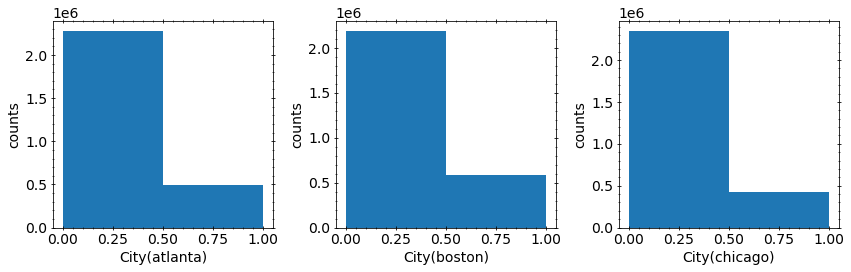

I1004 09:32:12.665686 4667090368 category.py:225] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
I1004 09:32:12.668319 4667090368 category.py:225] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


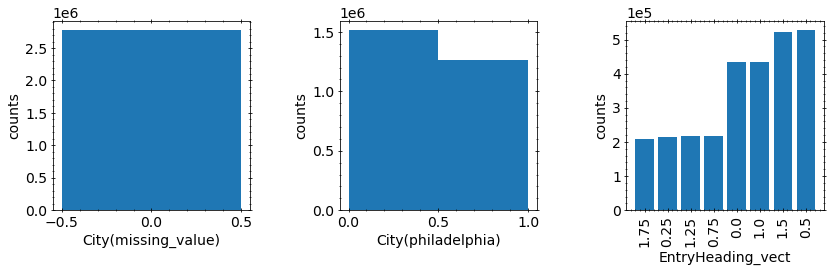

I1004 09:32:13.700581 4667090368 category.py:225] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
I1004 09:32:13.702372 4667090368 category.py:225] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
I1004 09:32:13.709264 4667090368 category.py:225] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
I1004 09:32:13.774885 4667090368 category.py:225] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
I1004 09:32:13.776613 4667090368 categor

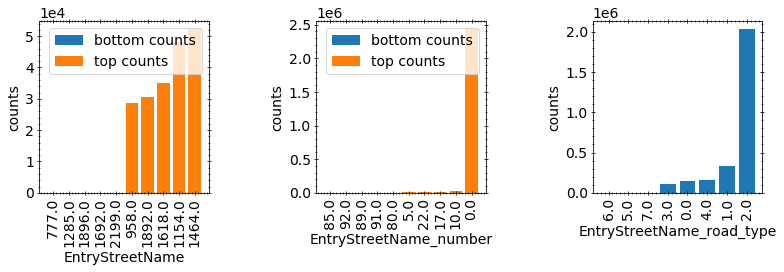

I1004 09:32:15.583894 4667090368 category.py:225] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
I1004 09:32:15.586607 4667090368 category.py:225] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
I1004 09:32:15.664511 4667090368 category.py:225] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
I1004 09:32:15.667079 4667090368 category.py:225] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
I1004 09:32:15.675740 4667090368 categor

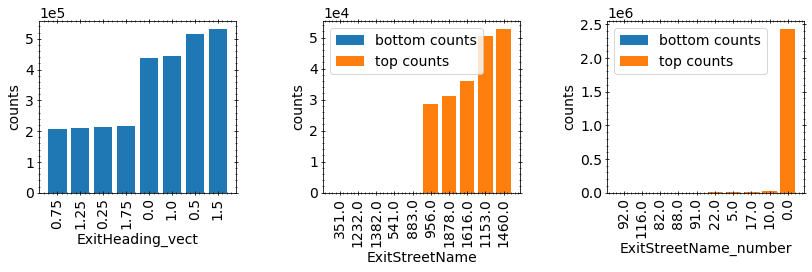

I1004 09:32:17.761416 4667090368 category.py:225] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
I1004 09:32:17.763692 4667090368 category.py:225] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
I1004 09:32:17.847100 4667090368 category.py:225] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
I1004 09:32:17.849858 4667090368 category.py:225] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
I1004 09:32:17.858742 4667090368 categor

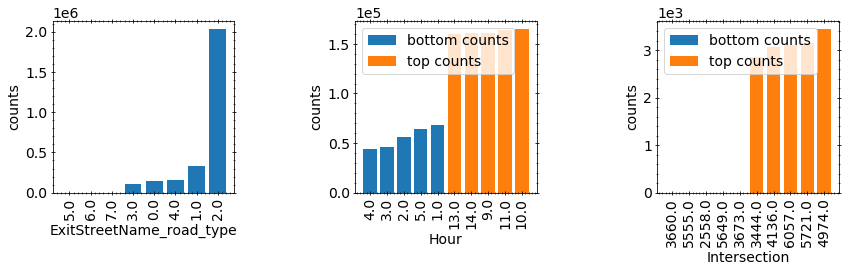

I1004 09:32:19.671881 4667090368 category.py:225] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
I1004 09:32:19.673801 4667090368 category.py:225] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
I1004 09:32:19.679796 4667090368 category.py:225] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


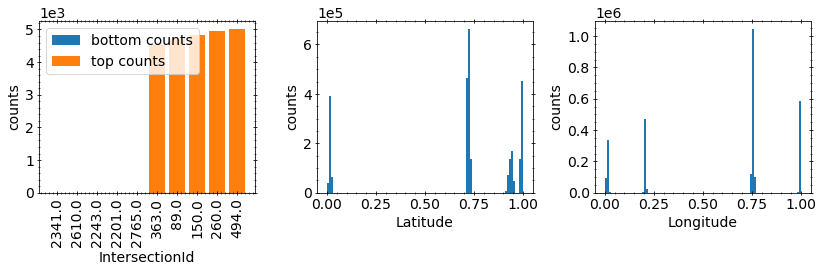

I1004 09:32:21.457826 4667090368 category.py:225] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
I1004 09:32:21.459379 4667090368 category.py:225] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
I1004 09:32:21.544699 4667090368 category.py:225] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
I1004 09:32:21.546262 4667090368 category.py:225] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
I1004 09:32:21.551612 4667090368 categor

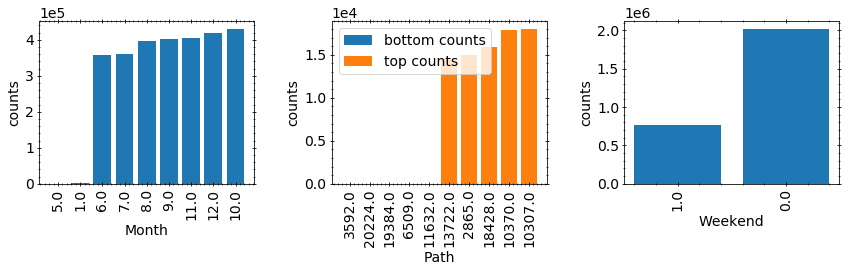

I1004 09:32:23.206054 4667090368 category.py:225] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
I1004 09:32:23.207561 4667090368 category.py:225] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


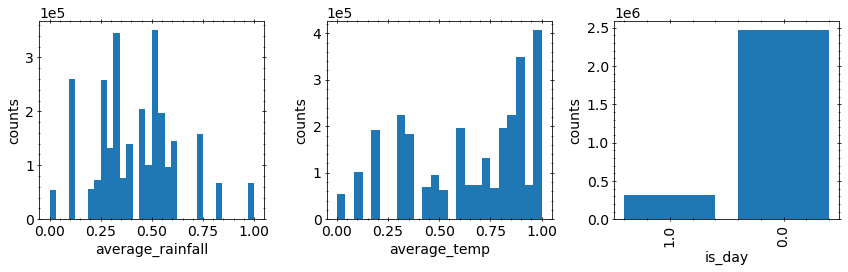

I1004 09:32:24.041894 4667090368 category.py:225] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
I1004 09:32:24.043496 4667090368 category.py:225] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


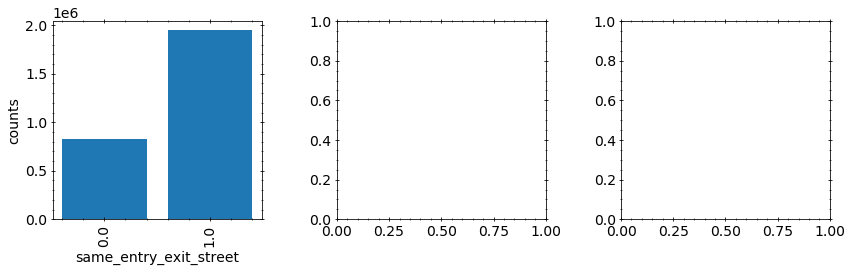

In [44]:
importlib.reload(JLpyUtils.plot)
JLpyUtils.plot.hist_or_bar(X, categorical_headers=headers_dict['categorical features'])

# Define Train Test Field Sets

IntersectionId  Latitude  Longitude  EntryStreetName  ExitStreetName  \
857409              1.0  0.011530   0.207344           1352.0          1016.0   
857410              1.0  0.011530   0.207344           1352.0          1347.0   
857411              1.0  0.011530   0.207344           1352.0          1347.0   
857412              1.0  0.011530   0.207344           1352.0          1347.0   
857413              1.0  0.011530   0.207344           1352.0          1347.0   
...                 ...       ...        ...              ...             ...   
2777739          1990.0  0.718088   0.754273           1579.0          1575.0   
2777740          1990.0  0.718088   0.754273           1579.0          1575.0   
2777741          1990.0  0.718088   0.754273           1579.0           247.0   
2777742          1990.0  0.718088   0.754273           1579.0          1575.0   
2777743          1990.0  0.718088   0.754273           1579.0          1575.0   

         Hour  Weekend  Month     Path  EntryStreetName_number  \
857409    0.0      0.0    6.0  12487.0                     0.0   
857410    0.0      0.0    6.0  12488.0                     0.0   
857411    1.0      0.0    6.0  12480.0                     0.0   
857412    1.0      0.0    6.0  12488.0                     0.0   
857413    2.0      0.0    6.0  12480.0                     0.0   
...       ...      ...    ...      ...                     ...   
2777739  17.0      1.0   12.0  14869.0                     4.0   
2777740  18.0      1.0   12.0  14869.0                     4.0   
2777741  21.0      1.0   12.0  14856.0                     4.0   
2777742  21.0      1.0   12.0  14869.0                     4.0   
2777743  22.0      1.0   12.0  14869.0                     4.0   

         ExitStreetName_number  EntryHeading_vect  ExitHeading_vect  \
857409                     0.0               1.25              0.75   
857410                     0.0               1.25              1.25   
857411                     0.0               0.25              0.25   
857412                     0.0               1.25              1.25   
857413                     0.0               0.25              0.25   
...                        ...                ...               ...   
2777739                    4.0               1.00              1.00   
2777740                    4.0               1.00              1.00   
2777741                    0.0               1.00              1.50   
2777742                    4.0               1.00              1.00   
2777743                    4.0               1.00              1.00   

         EntryStreetName_road_type  ExitStreetName_road_type  \
857409                         2.0                       2.0   
857410                         2.0                       2.0   
857411                         2.0                       2.0   
857412                         2.0                       2.0   
857413                         2.0                       2.0   
...                            ...                       ...   
2777739                        2.0                       2.0   
2777740                        2.0                       2.0   
2777741                        2.0                       2.0   
2777742                        2.0                       2.0   
2777743                        2.0                       2.0   

         same_entry_exit_street  Intersection  average_temp  average_rainfall  \
857409                      0.0        2602.0      0.901961          0.446097   
857410                      1.0        2602.0      0.901961          0.446097   
857411                      1.0        2602.0      0.901961          0.446097   
857412                      1.0        2602.0      0.901961          0.446097   
857413                      1.0        2602.0      0.901961          0.446097   
...                         ...           ...           ...               ...   
2777739                     1.0        2585.0      0.1

In [55]:
X_field = X.iloc[-n_field_samples:,:]
X = X.iloc[:n_train_samples,:]

In [56]:
X.shape

(857409, 25)

In [57]:
y.shape

(857409, 6)

In [60]:
path_feat_eng_dir = os.path.join(path_report_dir, 'feat_eng')
path_feat_eng_case_dir = os.path.join(path_feat_eng_dir,'v4.0.0')

os.makedirs(path_feat_eng_case_dir)

X_field.to_csv(os.path.join(path_feat_eng_case_dir,'X_field.csv'),index=False)
X.to_csv(os.path.join(path_feat_eng_case_dir,'X.csv'),index=False)
y.to_csv(os.path.join(path_feat_eng_case_dir,'y.csv'),index=False)

# Model Selection

In [ ]:
importlib.reload(JLpyUtils.ML.model_selection.default_models_dict)

n_features = X.shape[1]
n_labels = y.shape[1]
models=['XGBoost','Linear',  'DecisionTree', 'RandomForest']#'DenseNet''KNN',

models_dict = JLpyUtils.ML.model_selection.default_models_dict.regression(n_features, n_labels, models)
models_dict

In [ ]:
importlib.reload(JLpyUtils.ML.model_selection)
importlib.reload(JLpyUtils.ML.model_selection._search)
importlib.reload(JLpyUtils.ML.model_selection)
importlib.reload(JLpyUtils.ML.model_selection._search)

GridSearch_dir = os.path.join(feat_eng_case_dir,'GridSearchCV(y_MinMax_log1p_Scaled)')

metrics = {'r2_score': sklearn.metrics.r2_score}
GridSearchCV = JLpyUtils.ML.model_selection.GridSearchCV(models_dict,
                                                         cv=4, 
                                                         scoring={'metric': None, 
                                                                  'maximize': True}, 
                                                         metrics=metrics, 
                                                         retrain=False, 
                                                         path_root_dir=GridSearch_dir, 
                                                         n_jobs=-1, 
                                                         verbose=2)

In [ ]:
GridSearchCV.fit(X_train, y_train, X_test, y_test)

https://ml.dask.org/examples/xgboost.html

In [ ]:
importlib.reload(JLpyUtils.ML.inspection.compare)

metrics = {'r2_score': sklearn.metrics.r2_score,
           'mse':sklearn.metrics.mean_squared_error,
           'mae':sklearn.metrics.mean_absolute_error}

_, df_metrics = JLpyUtils.ML.inspection.compare.model_metrics(GridSearchCV.models_dict, metrics, X_test, y_test)

# Fetch BoB model

In [ ]:
BoB_model_ID = df_metrics['model'].iloc[-1]
BoB_model_ID

In [ ]:
BoB_model = GridSearchCV.models_dict[best_model_ID]['best_model']
BoB_model

# Evaluate on Field Data

In [ ]:
y_field = BoB_model.predict(X_field)
y_field = pd.DataFrame(Scaler_y.inverse_transform(y_field), columns = list(y.columns))

#ensure no values outside physical limits
for header in y_field.columns:
    y_field[y_field[header]<0] = 0

y_field.head()

In [ ]:
def reformat_field_preds_for_submission(y_field):
    submission_metric_map = JLpyUtils.file_utils.load('submission_metric_map','json',
                                                      path_competition_data)
    
    # ensure consistant ordering of columns
    y_field = y_field[[submission_metric_map[key] for key in submission_metric_map.keys()]]
    y_field = np.array(y_field)
    
    n_rows = y_field.shape[0]*y_field.shape[1]
    
    y_field_formatted = {'TargetID':['empty' for val in range(n_rows)],
                         'Target': [0 for val in range(n_rows)] 
                        }
    
    
    r = 0
    for i in range(y_field.shape[0]):
        for j in range(y_field.shape[1]):
            y_field_formatted['TargetID'][r] = str(i)+'_'+str(j)
            y_field_formatted['Target'][r] = y_field[i,j]
            r+=1
    
    y_field_formatted = pd.DataFrame.from_dict(y_field_formatted)
    
    return y_field_formatted
                      
y_field_formatted = reformat_field_preds_for_submission(y_field)
y_field_formatted.head()

In [ ]:
y_field_formatted.tail()

In [ ]:
y_field_formatted.to_csv(os.path.join(GridSearch_dir, 'y_field_formatted.csv'),
                         index=False)

In [ ]:
GridSearch_dir